In [1]:
import numpy as np
import json, pickle
import networkx as nx
import matplotlib.pyplot as plt
import operator

In [2]:
def constructGraph(video_data):
    G = nx.DiGraph()
    counter = 0 
    # add nodes 
    for key in video_data:
        if key == None:
            continue
        G.add_node(key)
    # set node colors 
    color_map = []
    blue_nodes = []
    red_nodes = []
    yellow_nodes = []
    for node in G:
        if video_data[node]['Predicted Label'] == 0:
            color_map.append('blue')
            blue_nodes.append(node)
        elif video_data[node]['Predicted Label'] == 1:
            color_map.append('red')
            red_nodes.append(node)
        else:
            color_map.append('yellow')
            yellow_nodes.append(node)
    # add edges with edge weights 
    for node in G:
        adj_list = video_data[node]['pointers']
        for neighbor in adj_list:                
            if neighbor == None:
                continue 
            if neighbor not in G: # considers pruning of 7th iteration
                continue 
            video_duration = video_data[neighbor]['time']
            G.add_edge(neighbor, node, weight=video_duration)
    return G, color_map

In [3]:
with open('nopol_ntnc_100_predicted.json', 'r') as dest:
    video_data_nopol = json.load(dest)
G_nopol, color_map_nopol = constructGraph(video_data_nopol)

In [4]:
with open('nopol36_ntnc_100_predicted.json', 'r') as dest:
    video_data_nopol36 = json.load(dest)
G_nopol36, color_map_nopol36 = constructGraph(video_data_nopol36)

In [5]:
with open('repub_nopol36_ntnc_100_predicted.json', 'r') as dest:
    video_data_rnopol36 = json.load(dest)
G_rnopol36, color_map_rnopol36 = constructGraph(video_data_rnopol36)

In [6]:
with open('dem_nopol36_ntnc_100_predicted.json', 'r') as dest:
    video_data_dnopol36 = json.load(dest)
G_dnopol36, color_map_dnopol36 = constructGraph(video_data_dnopol36)

In [7]:
with open('cen_nopol36_ntnc_100_predicted.json', 'r') as dest:
    video_data_cnopol36 = json.load(dest)
G_cnopol36, color_map_cnopol36 = constructGraph(video_data_cnopol36)

In [8]:
with open('repub_nopol_ntnc_100_predicted.json', 'r') as dest:
    video_data_rnopol = json.load(dest)
G_rnopol, color_map_rnopol = constructGraph(video_data_rnopol)

In [9]:
with open('dem_nopol_ntnc_100_predicted.json', 'r') as dest:
    video_data_dnopol = json.load(dest)
G_dnopol, color_map_dnopol = constructGraph(video_data_dnopol)

In [10]:
with open('cen_nopol_ntnc_100_predicted.json', 'r') as dest:
    video_data_cnopol = json.load(dest)
G_cnopol, color_map_cnopol = constructGraph(video_data_cnopol)

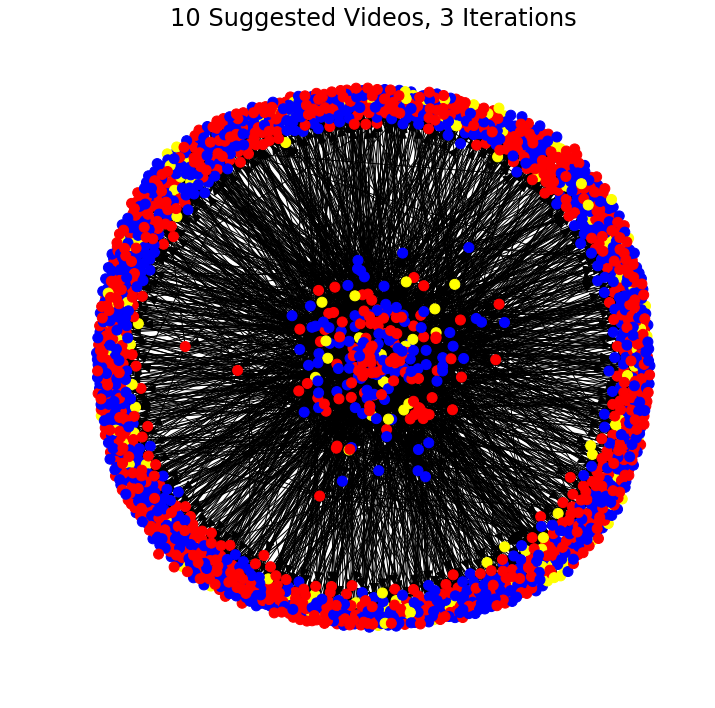

1827


In [52]:
plt.figure(figsize=(12,12))
plt.title('10 Suggested Videos, 3 Iterations', fontdict={'fontsize':24})
nx.draw(G_nopol, node_color = color_map_nopol, node_size=100, arrowsize=20, pos=nx.spring_layout(G_nopol, k=(1/15)))
plt.show()
print(G_nopol.number_of_nodes())

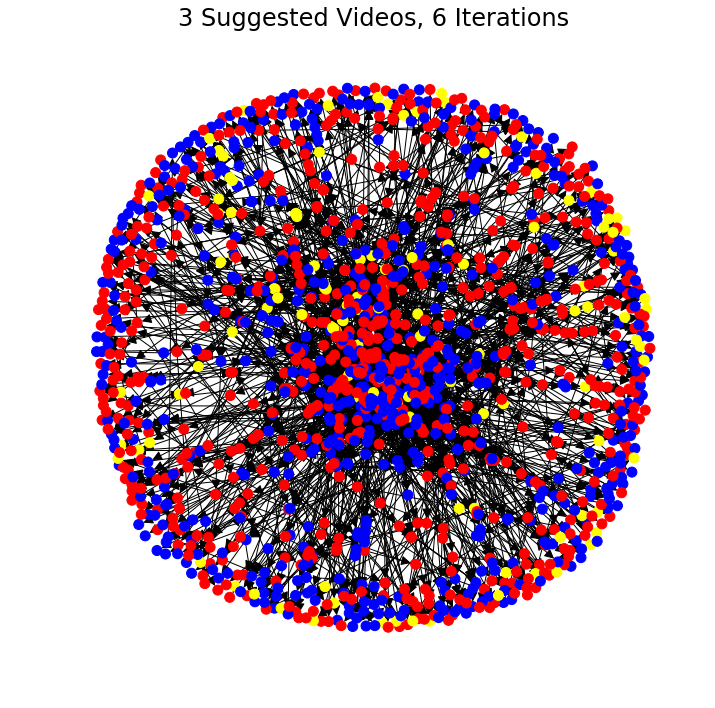

1577


In [53]:
plt.figure(figsize=(12,12))
plt.title('3 Suggested Videos, 6 Iterations', fontdict={'fontsize':24})
nx.draw(G_nopol36, node_color = color_map_nopol36, node_size=100, arrowsize=20, pos=nx.spring_layout(G_nopol36))
plt.show()
print(G_nopol36.number_of_nodes())

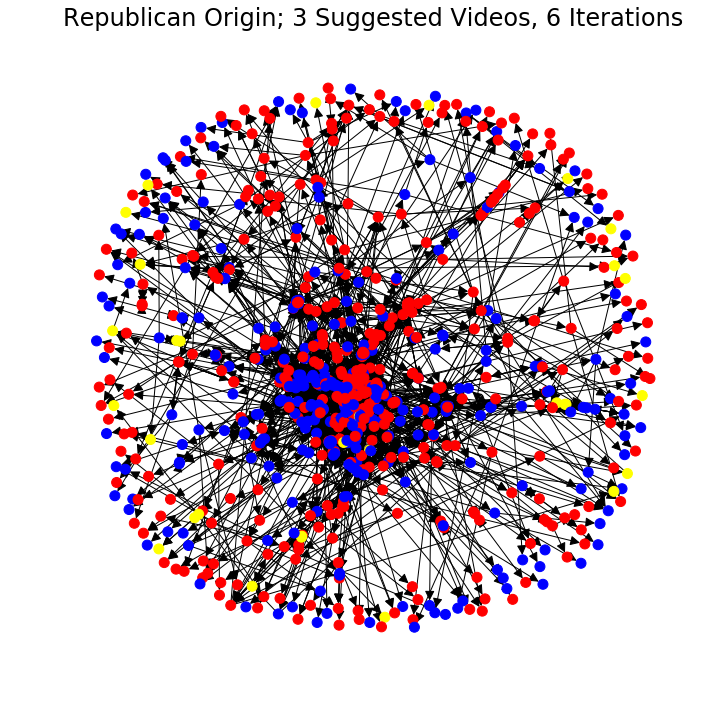

763


In [56]:
plt.figure(figsize=(12,12))
plt.title('Republican Origin; 3 Suggested Videos, 6 Iterations', fontdict={'fontsize':24})
nx.draw(G_rnopol36, node_color = color_map_rnopol36, node_size=100, arrowsize=20, pos=nx.spring_layout(G_rnopol36, k=(1/40)))
plt.show()
print(G_rnopol36.number_of_nodes())

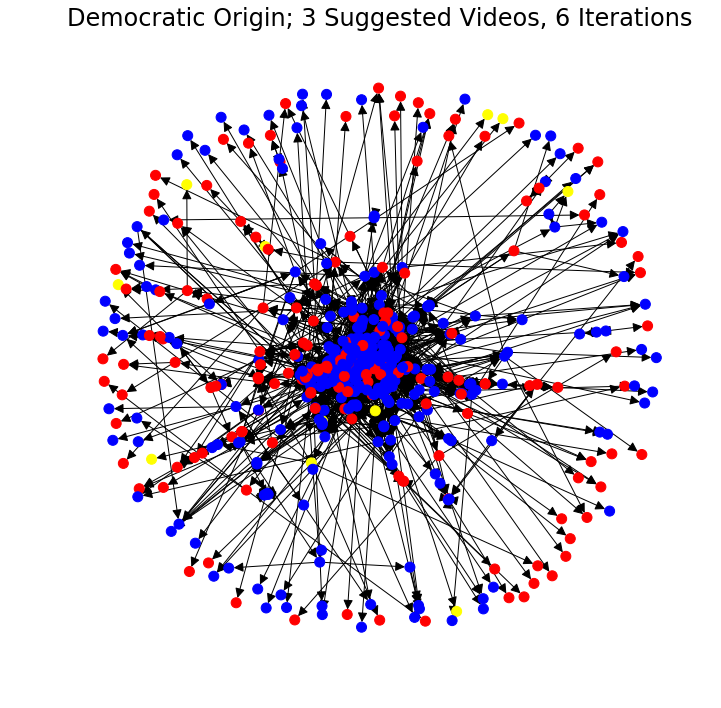

574


In [57]:
plt.figure(figsize=(12,12))
plt.title('Democratic Origin; 3 Suggested Videos, 6 Iterations', fontdict={'fontsize':24})
nx.draw(G_dnopol36, node_color = color_map_dnopol36, node_size=100, arrowsize=20, pos=nx.spring_layout(G_dnopol36, k=(1/40)))
plt.show()
print(G_dnopol36.number_of_nodes())

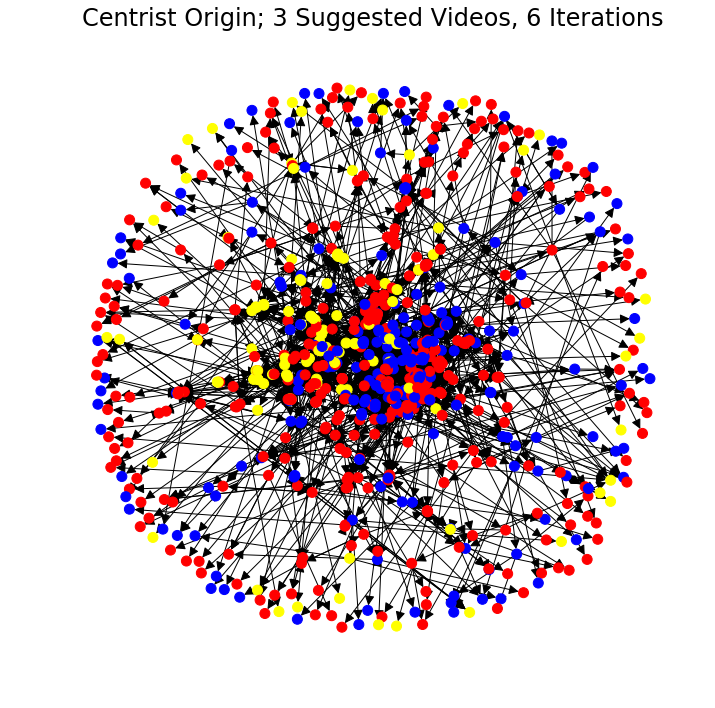

751


In [58]:
plt.figure(figsize=(12,12))
plt.title('Centrist Origin; 3 Suggested Videos, 6 Iterations', fontdict={'fontsize':24})
nx.draw(G_cnopol36, node_color = color_map_cnopol36, node_size=100, arrowsize=20, pos=nx.spring_layout(G_cnopol36, k=(1/40)))
plt.show()
print(G_cnopol36.number_of_nodes())

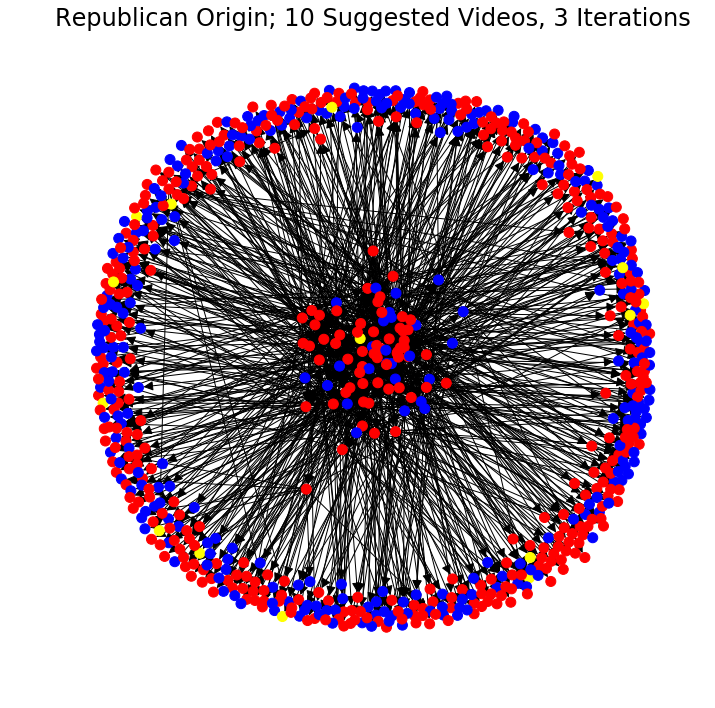

737


In [59]:
plt.figure(figsize=(12,12))
plt.title('Republican Origin; 10 Suggested Videos, 3 Iterations', fontdict={'fontsize':24})
nx.draw(G_rnopol, node_color = color_map_rnopol, node_size=100, arrowsize=20, pos=nx.spring_layout(G_rnopol, k=(1/40)))
plt.show()
print(G_rnopol.number_of_nodes())

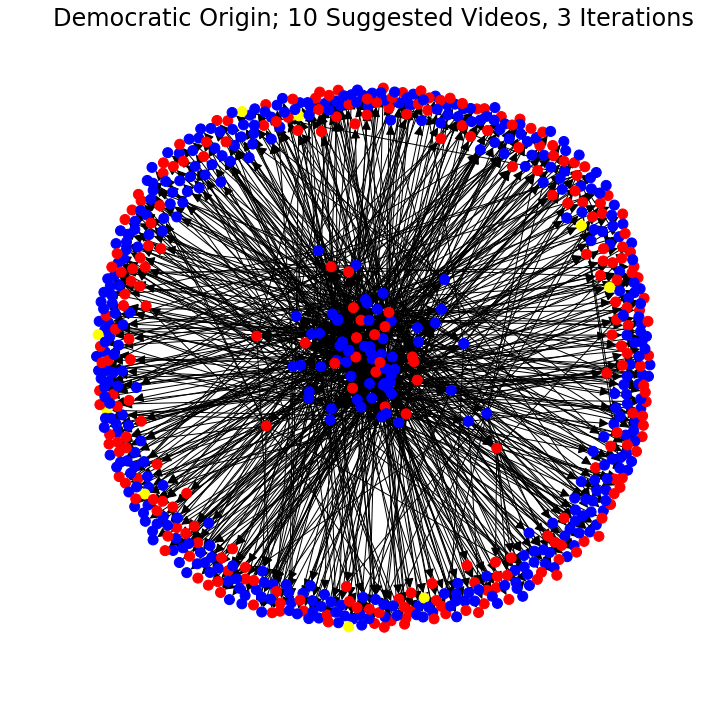

684


In [60]:
plt.figure(figsize=(12,12))
plt.title('Democratic Origin; 10 Suggested Videos, 3 Iterations', fontdict={'fontsize':24})
nx.draw(G_dnopol, node_color = color_map_dnopol, node_size=100, arrowsize=20, pos=nx.spring_layout(G_dnopol, k=(1/40)))
plt.show()
print(G_dnopol.number_of_nodes())

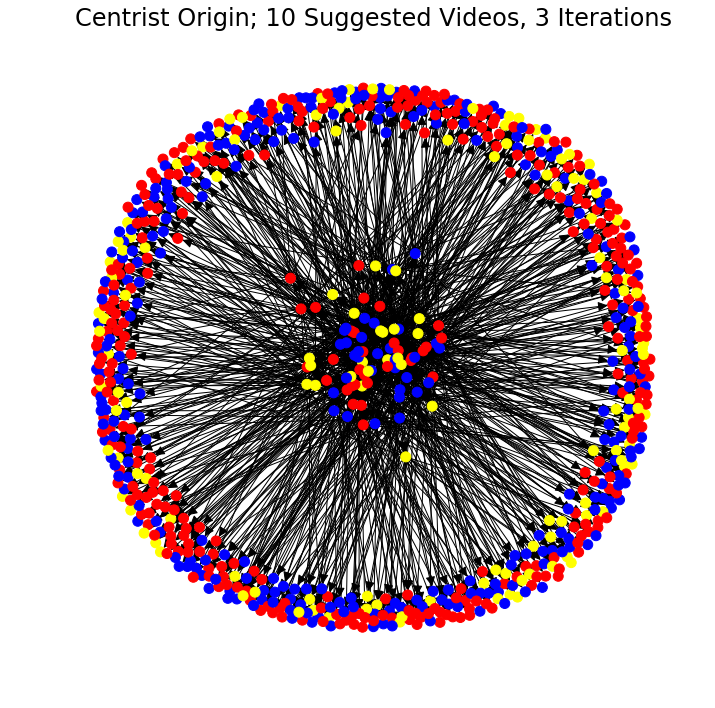

782


In [61]:
plt.figure(figsize=(12,12))
plt.title('Centrist Origin; 10 Suggested Videos, 3 Iterations', fontdict={'fontsize':24})
nx.draw(G_cnopol, node_color = color_map_cnopol, node_size=100, arrowsize=20, pos=nx.spring_layout(G_cnopol, k=(1/40)))
plt.show()
print(G_cnopol.number_of_nodes())

In [26]:
def nodeCount(video_data):
    dem_nodes = 0
    cen_nodes = 0 
    repub_nodes = 0
    for video_id, video_dict in video_data.items():
        if video_dict['Predicted Label'] == 0:
            dem_nodes += 1
        if video_dict['Predicted Label'] == 1:
            repub_nodes += 1
        if video_dict['Predicted Label'] == 2:
            cen_nodes += 1
    total_nodes = dem_nodes + cen_nodes + repub_nodes
    return dem_nodes/total_nodes, cen_nodes/total_nodes, repub_nodes/total_nodes 

In [88]:
dem_npc36_nodes+dem_npr36_nodes+dem_npd36_nodes

571

In [89]:
repub_npc36_nodes+repub_npr36_nodes+repub_npd36_nodes

1020

In [91]:
cen_npc36_nodes+cen_npr36_nodes+cen_npd36_nodes

497

In [94]:
G_rnopol36.number_of_nodes()

763

In [95]:
G_dnopol36.number_of_nodes()

574

In [96]:
G_cnopol36.number_of_nodes()

751

In [22]:
dem_np36_nodes, cen_np36_nodes, repub_np36_nodes = nodeCount(video_data_nopol36)

In [23]:
dem_npc36_nodes, cen_npc36_nodes, repub_npc36_nodes = nodeCount(video_data_cnopol36)

In [24]:
dem_npr36_nodes, cen_npr36_nodes, repub_npr36_nodes = nodeCount(video_data_rnopol36)

In [25]:
dem_npd36_nodes, cen_npd36_nodes, repub_npd36_nodes = nodeCount(video_data_dnopol36)

In [68]:
dem_np_nodes, cen_np_nodes, repub_np_nodes = nodeCount(video_data_nopol)
dem_npc_nodes, cen_npc_nodes, repub_npc_nodes = nodeCount(video_data_cnopol)
dem_npr_nodes, cen_npr_nodes, repub_npr_nodes = nodeCount(video_data_rnopol)
dem_npd_nodes, cen_npd_nodes, repub_npd_nodes = nodeCount(video_data_dnopol)

In [16]:
repub_npr36_nodes

0.546526867627785

Text(0, 0.5, 'Node Count')

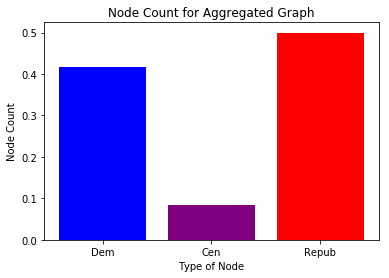

In [17]:
# Add percents in labels
# repeat for 10,3 graphs
plt.figure()
x=np.arange(3)
plt.bar(x, (dem_np36_nodes, cen_np36_nodes, repub_np36_nodes), color=('blue', 'purple','red'))
plt.title("Node Count for Aggregated Graph")
plt.xticks(list(range(3)), ['Dem','Cen','Repub'])
plt.xlabel('Type of Node')
plt.ylabel('Node Count')

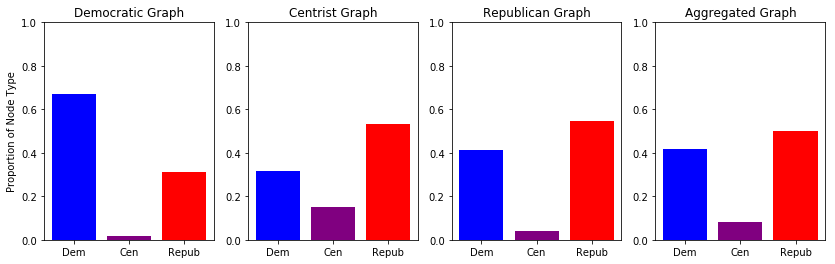

In [26]:
f, axarr = plt.subplots(1,4, figsize=(14,4))
x = np.arange(3)
axarr[0].bar(x, (dem_npd36_nodes, cen_npd36_nodes, repub_npd36_nodes), color=('blue', 'purple','red'))
axarr[0].set_title('Democratic Graph')
axarr[0].set_ylabel('Proportion of Node Type')
axarr[0].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[0].set_ylim([0,1])
axarr[1].bar(x, (dem_npc36_nodes, cen_npc36_nodes, repub_npc36_nodes), color=('blue', 'purple','red'))
axarr[1].set_title('Centrist Graph')
axarr[1].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[1].set_ylim([0,1])
axarr[2].bar(x, (dem_npr36_nodes, cen_npr36_nodes, repub_npr36_nodes), color=('blue', 'purple','red'))
axarr[2].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[2].set_title('Republican Graph')
axarr[2].set_ylim([0,1])
axarr[3].bar(x, (dem_np36_nodes, cen_np36_nodes, repub_np36_nodes), color=('blue', 'purple','red'))
axarr[3].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[3].set_title('Aggregated Graph')
axarr[3].set_ylim([0,1])
plt.show()


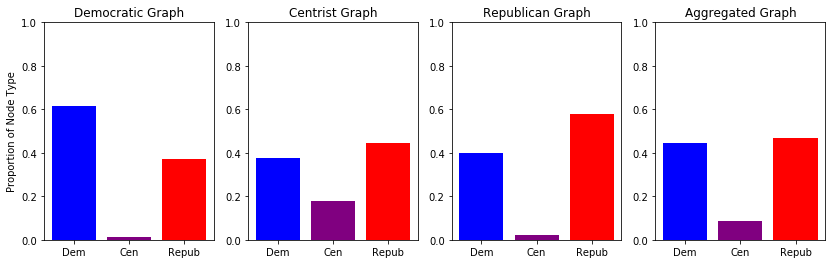

In [70]:
f, axarr = plt.subplots(1,4, figsize=(14,4))
x = np.arange(3)
axarr[0].bar(x, (dem_npd_nodes, cen_npd_nodes, repub_npd_nodes), color=('blue', 'purple','red'))
axarr[0].set_title('Democratic Graph')
axarr[0].set_ylabel('Proportion of Node Type')
axarr[0].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[0].set_ylim([0,1])
axarr[1].bar(x, (dem_npc_nodes, cen_npc_nodes, repub_npc_nodes), color=('blue', 'purple','red'))
axarr[1].set_title('Centrist Graph')
axarr[1].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[1].set_ylim([0,1])
axarr[2].bar(x, (dem_npr_nodes, cen_npr_nodes, repub_npr_nodes), color=('blue', 'purple','red'))
axarr[2].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[2].set_title('Republican Graph')
axarr[2].set_ylim([0,1])
axarr[3].bar(x, (dem_np_nodes, cen_np_nodes, repub_np_nodes), color=('blue', 'purple','red'))
axarr[3].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[3].set_title('Aggregated Graph')
axarr[3].set_ylim([0,1])
plt.show()

In [87]:
repub_npc36_nodes+repub_npd36_nodes+repub_npr36_nodes

1020

In [247]:
def nbrDistrib(G, video_data, graph_name, lastIterNum):
    dem_nbr_distribs = []
    cen_nbr_distribs = []
    repub_nbr_distribs = []
    counter = 0
    for video in G:
        if video_data[video]['iterNum'] == lastIterNum:
            continue
        dem_nbrs = 0
        repub_nbrs = 0
        cen_nbrs = 0
        num_nbrs = len(list(G.neighbors(video)))
        if num_nbrs == 0:
            continue
        counter += 1
        for nbr in G.neighbors(video):
            if video_data[nbr]['Predicted Label'] == 0:
                dem_nbrs += 1
            if video_data[nbr]['Predicted Label'] == 1:
                repub_nbrs += 1
            if video_data[nbr]['Predicted Label'] == 2:
                cen_nbrs += 1
        if dem_nbrs + repub_nbrs + cen_nbrs != len(list(G.neighbors(video))):
            print('NOPE')
            print(video)
            break
        dem_nbr_distribs.append(dem_nbrs / num_nbrs)
        cen_nbr_distribs.append(cen_nbrs / num_nbrs)
        repub_nbr_distribs.append(repub_nbrs / num_nbrs)
    
    f, axarr = plt.subplots(3, sharey=True, figsize=(8,8))
    
    n, bins, _ = axarr[0].hist(dem_nbr_distribs, density=True, bins=10, color='blue')
    axarr[0].set_title('Successor Distribution for {0}'.format(graph_name))
    axarr[0].set_xlabel('Number of Democratic Successors')
    axarr[0].set_ylabel('Percentage of Nodes')
    axarr[1].hist(cen_nbr_distribs, density=True, color='purple')
    axarr[1].set_xlabel('Number of Centrist Successors')
    axarr[1].set_ylabel('Percentage of Nodes')
    axarr[2].hist(repub_nbr_distribs, density=True, color='red')
    axarr[2].set_xlabel('Number of Republican Successors')
    axarr[2].set_ylabel('Percentage of Nodes')
    
    f.tight_layout()

In [41]:
def pageRankAnalysis(G, video_data):
    pagerank_g = nx.pagerank(G)
    pagerank_g = sorted(pagerank_g.items(), key=operator.itemgetter(1))[::-1]
    
    num_consider = 10
    shortlist_g = pagerank_g[0:num_consider]
    print('ID\t\tChannel\t\tPredicted Label\t\tPageRank')
    print('----------------------------------------------------')
    dem_nodes = 0
    cen_nodes = 0
    repub_nodes = 0
    for video in shortlist_g:
        video_id = video[0]
        pr_val = video[1]
        print('{}\t\t{}\t\t{}\t\t{:3.7f}'.format(video_id, video_data[video_id]['channelTitle'][0:15], video_data[video_id]['Predicted Label'], pr_val))
        if video_data[video_id]['Predicted Label'] == 0:
            dem_nodes += 1
        if video_data[video_id]['Predicted Label'] == 1:
            repub_nodes += 1
        if video_data[video_id]['Predicted Label'] == 2:
            cen_nodes += 1
    print('-----------------------------------------------------')
    print('Dems: {0}'.format(dem_nodes/num_consider))
    print('Cens: {0}'.format(cen_nodes/num_consider))
    print('Reps: {0}'.format(repub_nodes/num_consider))
    return dem_nodes/num_consider, cen_nodes/num_consider, repub_nodes/num_consider
    

In [42]:
pr_dn_nopol36, pr_cn_nopol36, pr_rn_nopol36 = pageRankAnalysis(G_nopol36, video_data_nopol36)

ID		Channel		Predicted Label		PageRank
----------------------------------------------------
LeHuKBUBXgQ		Chris Cuomo & A		0.0		0.0124480
7a0CDbUCrS4		World Affairs		2.0		0.0078605
b8gRGJdWbcc		Fox News		1.0		0.0048973
81qzO4e2i04		Chris Cuomo & A		0.0		0.0045959
570oJ9pFQUE		The Hannity		0.0		0.0045141
YVZmXQuy2Kk		The Hannity		0.0		0.0040793
PJF5Amo6cWw		The Agenda with		2.0		0.0040282
Y2rg1VK6Nhc		Ralph Nader Rad		0.0		0.0035375
zy2YnAYn08Q		IntelligenceSqu		0.0		0.0035304
o0G9A0NVxc8		H Chan		0.0		0.0035252
-----------------------------------------------------
Dems: 0.7
Cens: 0.2
Reps: 0.1


In [43]:
pr_dn_dnopol36, pr_cn_dnopol36, pr_rn_dnopol36 = pageRankAnalysis(G_dnopol36, video_data_dnopol36)

ID		Channel		Predicted Label		PageRank
----------------------------------------------------
LeHuKBUBXgQ		Chris Cuomo & A		0.0		0.0425462
qXD8uFU-xgM		Peter Wörnlein		1.0		0.0149458
b8gRGJdWbcc		Fox News		1.0		0.0140151
c4yTaP6roTw		CNN		0.0		0.0126101
CuXlBSuQbMo		Late Night with		0.0		0.0120109
y97QknIG-Eo		Fox News		1.0		0.0112969
MGvGJLey1gA		Face the Nation		0.0		0.0094518
yxH30Nx17H4		MSNBC		1.0		0.0094420
yM7-Gho0xPg		Pearl Harbor		0.0		0.0092086
vqjyNbQgYNg		RT America		1.0		0.0086942
-----------------------------------------------------
Dems: 0.5
Cens: 0.0
Reps: 0.5


In [44]:
pr_dn_cnopol36, pr_cn_cnopol36, pr_rn_cnopol36 = pageRankAnalysis(G_cnopol36, video_data_cnopol36)

ID		Channel		Predicted Label		PageRank
----------------------------------------------------
Y625bRJVkuI		DW Documentary		1.0		0.0134103
CuXlBSuQbMo		Late Night with		0.0		0.0123458
LeHuKBUBXgQ		Chris Cuomo & A		0.0		0.0104421
uJcaEs6HMls		The Late Show w		0.0		0.0085749
YWwqUNf3ON8		The Daily Show 		0.0		0.0077986
YDXeoT7gTog		Fox News		1.0		0.0071803
PJF5Amo6cWw		The Agenda with		2.0		0.0069326
7a0CDbUCrS4		World Affairs		2.0		0.0069235
R9unEphwPA8		meshaal alhojai		1.0		0.0061477
o0G9A0NVxc8		H Chan		0.0		0.0061398
-----------------------------------------------------
Dems: 0.5
Cens: 0.2
Reps: 0.3


In [45]:
pr_dn_rnopol36, pr_cn_rnopol36, pr_rn_rnopol36 = pageRankAnalysis(G_rnopol36, video_data_rnopol36)

ID		Channel		Predicted Label		PageRank
----------------------------------------------------
LeHuKBUBXgQ		Chris Cuomo & A		0.0		0.0282817
81qzO4e2i04		Chris Cuomo & A		0.0		0.0103167
CuXlBSuQbMo		Late Night with		0.0		0.0094790
b8gRGJdWbcc		Fox News		1.0		0.0091447
MGvGJLey1gA		Face the Nation		0.0		0.0084366
Anp90w26zNE		MSNBC		0.0		0.0080232
YWwqUNf3ON8		The Daily Show 		0.0		0.0076126
yM7-Gho0xPg		Pearl Harbor		0.0		0.0072990
BNWXMnLRbew		Top Trending		0.0		0.0063965
Uzna3vEMXEQ		Secret Truths		0.0		0.0062522
-----------------------------------------------------
Dems: 0.9
Cens: 0.0
Reps: 0.1


In [46]:
pr_dn_nopol, pr_cn_nopol, pr_rn_nopol = pageRankAnalysis(G_nopol, video_data_nopol)

ID		Channel		Predicted Label		PageRank
----------------------------------------------------
TfHPC1DwXnI		The Late Show w		0.0		0.0013813
LeHuKBUBXgQ		Chris Cuomo & A		0.0		0.0013024
k7jrcq_i8RY		Reflect		0.0		0.0011443
w6ytYaQ2kNE		Fox Business		0.0		0.0010234
MZrYSwejhZU		CBC News		1.0		0.0009434
jcWdwglRhfg		Fox News		1.0		0.0009256
MFLKv8uQMBQ		Jimmy Kimmel Li		0.0		0.0009006
q9x2V7emzH8		Fox News		1.0		0.0009000
A1CgxB6quBU		CNN		0.0		0.0008925
FDLN42iu6c8		The Hannity		0.0		0.0008884
-----------------------------------------------------
Dems: 0.7
Cens: 0.0
Reps: 0.3


In [47]:
pr_dn_dnopol, pr_cn_dnopol, pr_rn_dnopol = pageRankAnalysis(G_dnopol, video_data_dnopol)

ID		Channel		Predicted Label		PageRank
----------------------------------------------------
LeHuKBUBXgQ		Chris Cuomo & A		0.0		0.0031418
CuXlBSuQbMo		Late Night with		0.0		0.0028582
YWwqUNf3ON8		The Daily Show 		0.0		0.0026739
TfHPC1DwXnI		The Late Show w		0.0		0.0025781
LOOY6pvpWJg		Sky News		0.0		0.0024818
qL9nXM5A-DQ		Brian Tyler Coh		1.0		0.0023649
d-91kaGe7uM		The Daily Show 		0.0		0.0022957
r-szt1e1hp0		MSNBC		0.0		0.0022204
gMfNlPDISHg		The Late Show w		0.0		0.0020982
Anp90w26zNE		MSNBC		0.0		0.0020945
-----------------------------------------------------
Dems: 0.9
Cens: 0.0
Reps: 0.1


In [48]:
pr_dn_cnopol, pr_cn_cnopol, pr_rn_cnopol = pageRankAnalysis(G_cnopol, video_data_cnopol)

ID		Channel		Predicted Label		PageRank
----------------------------------------------------
MGvGJLey1gA		Face the Nation		0.0		0.0027448
LeHuKBUBXgQ		Chris Cuomo & A		0.0		0.0020967
OaX8UjgneXc		Face the Nation		0.0		0.0020843
MZrYSwejhZU		CBC News		1.0		0.0019901
YPxmBxON1l8		ABC News (Austr		1.0		0.0018702
Y625bRJVkuI		DW Documentary		1.0		0.0018125
X3JsC0S0mxM		Bloomberg Polit		1.0		0.0017745
jZdAlqiLCbY		Sky News		1.0		0.0017277
0nneNgwdk4Q		Face the Nation		0.0		0.0017161
UaWvgsxoOa0		Face the Nation		0.0		0.0016742
-----------------------------------------------------
Dems: 0.5
Cens: 0.0
Reps: 0.5


In [49]:
pr_dn_rnopol, pr_cn_rnopol, pr_rn_rnopol = pageRankAnalysis(G_rnopol, video_data_rnopol)

ID		Channel		Predicted Label		PageRank
----------------------------------------------------
LeHuKBUBXgQ		Chris Cuomo & A		0.0		0.0033697
jcWdwglRhfg		Fox News		1.0		0.0023196
q9x2V7emzH8		Fox News		1.0		0.0022506
YDXeoT7gTog		Fox News		1.0		0.0021873
b8gRGJdWbcc		Fox News		1.0		0.0021230
5qQgiHKNTOg		Fox News		1.0		0.0020176
1zt38VOOcAo		Fox News		0.0		0.0020109
CuXlBSuQbMo		Late Night with		0.0		0.0019886
y97QknIG-Eo		Fox News		1.0		0.0019821
pOlKLuogc0s		Fox News		1.0		0.0019684
-----------------------------------------------------
Dems: 0.3
Cens: 0.0
Reps: 0.7


# Average Distance

In [36]:
def calcDist(G, last_iter_num, video_data):
    shortest_paths_dr = []
    shortest_paths_dd = []
    shortest_paths_rd = []
    shortest_paths_rr = []
    dd_has_path = 0
    dd_no_path = 0
    dr_has_path = 0
    dr_no_path = 0 
    rd_has_path = 0
    rr_has_path = 0
    rd_no_path = 0
    rr_no_path = 0
    INITIAL_SHORTEST_PATH = 10e4 
    
    times = []
    for video in G:
        times.append(video_data[video]['time'])
    print('Mean: ', np.mean(times))
    print('Median: ', np.median(times))
    print('Standard Deviation: ', np.std(times))
    
    # calculate dist from dem to repub
    for source in G:
        if video_data[source]['Predicted Label'] == 0 and video_data[source]['iterNum'] != last_iter_num:
            shortest_path = INITIAL_SHORTEST_PATH
            shortest_paths = nx.single_source_dijkstra_path_length(G,source)
            for target in shortest_paths:
                if video_data[target]['Predicted Label'] == 1:
                    if shortest_paths[target] < shortest_path and shortest_paths[target] != 0:
                        shortest_path = shortest_paths[target]
            if shortest_path == INITIAL_SHORTEST_PATH:
                dr_no_path += 1 
            else:
                dr_has_path += 1
                shortest_paths_dr.append(shortest_path)
                
    # calculate dist from dem to dem 
    for source in G:
        if video_data[source]['Predicted Label'] == 0 and video_data[source]['iterNum'] != last_iter_num:
            shortest_path = INITIAL_SHORTEST_PATH
            shortest_paths = nx.single_source_dijkstra_path_length(G,source)
            for target in shortest_paths:
                if video_data[target]['Predicted Label'] == 0 and source != target:
                    if shortest_paths[target] < shortest_path and shortest_paths[target] != 0:
                        shortest_path = shortest_paths[target]
            if shortest_path == INITIAL_SHORTEST_PATH:
                dd_no_path += 1 
            else:
                dd_has_path += 1
                shortest_paths_dd.append(shortest_path)
    
    # calculate dist from repub to dem 
    for source in G:
        if video_data[source]['Predicted Label'] == 1 and video_data[source]['iterNum'] != last_iter_num:
            shortest_path = INITIAL_SHORTEST_PATH
            shortest_paths = nx.single_source_dijkstra_path_length(G,source)
            for target in shortest_paths:
                if video_data[target]['Predicted Label'] == 0:
                    if shortest_paths[target] < shortest_path and shortest_paths[target] != 0:
                        shortest_path = shortest_paths[target]
            if shortest_path == INITIAL_SHORTEST_PATH:
                rd_no_path += 1 
            else:
                rd_has_path += 1
                shortest_paths_rd.append(shortest_path)
    
    # calculate dist from repub to repub
    for source in G:
        if video_data[source]['Predicted Label'] == 1 and video_data[source]['iterNum'] != last_iter_num:
            shortest_path = INITIAL_SHORTEST_PATH
            shortest_paths = nx.single_source_dijkstra_path_length(G,source)
            for target in shortest_paths:
                if video_data[target]['Predicted Label'] == 1 and source != target:
                    if shortest_paths[target] < shortest_path and shortest_paths[target] != 0:
                        shortest_path = shortest_paths[target]
            if shortest_path == INITIAL_SHORTEST_PATH:
                rr_no_path += 1 
            else:
                rr_has_path += 1
                shortest_paths_rr.append(shortest_path)
    
    dd_mean = np.mean(shortest_paths_dd)
    dd_median = np.median(shortest_paths_dd)
    dd_std = np.std(shortest_paths_dd)
    dr_mean = np.mean(shortest_paths_dr)
    dr_median = np.median(shortest_paths_dr)
    dr_std = np.std(shortest_paths_dr)
    rr_mean = np.mean(shortest_paths_rr)
    rr_median = np.median(shortest_paths_rr)
    rr_std = np.std(shortest_paths_rr)
    rd_mean = np.mean(shortest_paths_rd)
    rd_median = np.median(shortest_paths_rd)
    rd_std = np.std(shortest_paths_rd)
    print('dd---------------')
    print(dd_mean)
    print(dd_median)
    print(dd_std)
    print(dd_has_path/(dd_has_path+dd_no_path))
    print('dr---------------')
    print(dr_mean)
    print(dr_median)
    print(dr_std)
    print(dr_has_path/(dr_has_path+dr_no_path))
    print('rr---------------')
    print(rr_mean)
    print(rr_median)
    print(rr_std)
    print(rr_has_path/(rr_has_path+rr_no_path))
    print('rd---------------')
    print(rd_mean)
    print(rd_median)
    print(rd_std)
    print(rd_has_path/(rd_has_path+rd_no_path))
    

In [37]:
calcDist(G_nopol36, 6, video_data_nopol36)

Mean:  21.100454449376457
Median:  10.616666666666667
Standard Deviation:  30.289498395774483
dd---------------
14.810659898477157
9.883333333333333
14.557570689161999
0.9162790697674419
dr---------------
21.541528545119707
11.233333333333333
29.30402633669992
0.8418604651162791
rr---------------
23.82080103359173
11.391666666666666
38.702262141630015
0.9772727272727273
rd---------------
31.417628205128207
13.816666666666666
44.049650825602406
0.7878787878787878


In [38]:
calcDist(G_nopol, 3, video_data_nopol)

Mean:  13.929209998175514
Median:  8.05
Standard Deviation:  19.939253387895945
dd---------------
11.79419191919192
6.608333333333333
21.79503706141886
0.9705882352941176
dr---------------
12.753030303030304
7.15
21.842240628327225
0.9705882352941176
rr---------------
14.115232974910391
7.45
21.540104112115532
0.96875
rd---------------
13.753663003663004
7.65
20.277037874667062
0.9479166666666666


# Topic Focused

In [17]:
with open('dem_mueller_10_3_predicted.json', 'r') as dest:
    video_data_d_mueller_10_3 = json.load(dest)
G_md_10_3, color_map_md_10_3 = constructGraph(video_data_d_mueller_10_3)

In [18]:
with open('cen_mueller_10_3_predicted.json', 'r') as dest:
    video_data_c_mueller_10_3 = json.load(dest)
G_mc_10_3, color_map_mc_10_3 = constructGraph(video_data_c_mueller_10_3)

In [19]:
with open('repub_mueller_10_3_predicted.json', 'r') as dest:
    video_data_r_mueller_10_3 = json.load(dest)
G_mr_10_3, color_map_mr_10_3 = constructGraph(video_data_r_mueller_10_3)

In [20]:
with open('mueller_10_3_predicted.json', 'r') as dest:
    video_data_mueller_10_3 = json.load(dest)
G_m_10_3, color_map_m_10_3 = constructGraph(video_data_mueller_10_3)

In [39]:
calcDist(G_m_10_3, 3, video_data_mueller_10_3)

Mean:  15.322307430129516
Median:  7.558333333333334
Standard Deviation:  35.357116682751595
dd---------------
9.988666666666667
6.525
9.62105471233678
0.9433962264150944
dr---------------
9.914285714285715
6.166666666666667
9.749690384060102
0.9245283018867925
rr---------------
11.221913580246916
8.091666666666667
8.945873375665284
1.0
rd---------------
11.495751633986929
7.916666666666667
9.399963984505042
0.9444444444444444


In [27]:
dem_m103_nodes, cen_m103_nodes, repub_m103_nodes = nodeCount(video_data_mueller_10_3)

In [28]:
dem_md103_nodes, cen_md103_nodes, repub_md103_nodes = nodeCount(video_data_d_mueller_10_3)

In [29]:
dem_mr103_nodes, cen_mr103_nodes, repub_mr103_nodes = nodeCount(video_data_r_mueller_10_3)

In [30]:
dem_mc103_nodes, cen_mc103_nodes, repub_mc103_nodes = nodeCount(video_data_c_mueller_10_3)

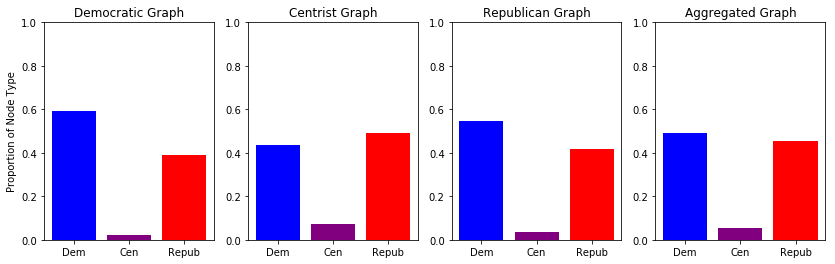

In [31]:
f, axarr = plt.subplots(1,4, figsize=(14,4))
x = np.arange(3)
axarr[0].bar(x, (dem_md103_nodes, cen_md103_nodes, repub_md103_nodes), color=('blue', 'purple','red'))
axarr[0].set_title('Democratic Graph')
axarr[0].set_ylabel('Proportion of Node Type')
axarr[0].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[0].set_ylim([0,1])
axarr[1].bar(x, (dem_mc103_nodes, cen_mc103_nodes, repub_mc103_nodes), color=('blue', 'purple','red'))
axarr[1].set_title('Centrist Graph')
axarr[1].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[1].set_ylim([0,1])
axarr[2].bar(x, (dem_mr103_nodes, cen_mr103_nodes, repub_mr103_nodes), color=('blue', 'purple','red'))
axarr[2].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[2].set_title('Republican Graph')
axarr[2].set_ylim([0,1])
axarr[3].bar(x, (dem_m103_nodes, cen_m103_nodes, repub_m103_nodes), color=('blue', 'purple','red'))
axarr[3].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[3].set_title('Aggregated Graph')
axarr[3].set_ylim([0,1])
plt.show()

In [26]:
with open('repub_mueller_3_6_predicted.json', 'r') as dest:
    video_data_r_mueller_3_6 = json.load(dest)
G_mr_3_6, color_map_mr_3_6 = constructGraph(video_data_r_mueller_3_6)

In [27]:
with open('cen_mueller_3_6_predicted.json', 'r') as dest:
    video_data_c_mueller_3_6 = json.load(dest)
G_mc_3_6, color_map_mc_3_6 = constructGraph(video_data_c_mueller_3_6)

In [28]:
with open('dem_mueller_3_6_predicted.json', 'r') as dest:
    video_data_d_mueller_3_6 = json.load(dest)
G_md_3_6, color_map_md_3_6 = constructGraph(video_data_d_mueller_3_6)

In [29]:
with open('mueller_3_6_predicted.json', 'r') as dest:
    video_data_mueller_3_6 = json.load(dest)
G_m_3_6, color_map_m_3_6 = constructGraph(video_data_mueller_3_6)

In [32]:
dem_m36_nodes, cen_m36_nodes, repub_m36_nodes = nodeCount(video_data_mueller_3_6)

In [34]:
dem_md36_nodes, cen_md36_nodes, repub_md36_nodes = nodeCount(video_data_d_mueller_3_6)

In [35]:
dem_mc36_nodes, cen_mc36_nodes, repub_mc36_nodes = nodeCount(video_data_c_mueller_3_6)

In [38]:
dem_mr36_nodes, cen_mr36_nodes, repub_mr36_nodes = nodeCount(video_data_r_mueller_3_6)

In [40]:
calcDist(G_m_3_6, 6, video_data_mueller_3_6)

Mean:  22.92159292035398
Median:  9.583333333333334
Standard Deviation:  48.79763034669585
dd---------------
16.555677655677655
8.85
17.17501010298772
0.9191919191919192
dr---------------
16.285440613026818
10.05
14.619287109326333
0.8787878787878788
rr---------------
21.787333333333336
12.433333333333334
18.177106651560976
0.9259259259259259
rd---------------
25.896268656716416
15.25
24.354800865840033
0.8271604938271605


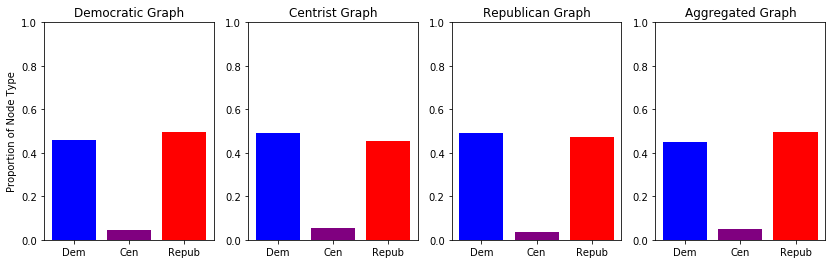

In [39]:
f, axarr = plt.subplots(1,4, figsize=(14,4))
x = np.arange(3)
axarr[0].bar(x, (dem_md36_nodes, cen_md36_nodes, repub_md36_nodes), color=('blue', 'purple','red'))
axarr[0].set_title('Democratic Graph')
axarr[0].set_ylabel('Proportion of Node Type')
axarr[0].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[0].set_ylim([0,1])
axarr[1].bar(x, (dem_mc36_nodes, cen_mc36_nodes, repub_mc36_nodes), color=('blue', 'purple','red'))
axarr[1].set_title('Centrist Graph')
axarr[1].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[1].set_ylim([0,1])
axarr[2].bar(x, (dem_mr36_nodes, cen_mr36_nodes, repub_mr36_nodes), color=('blue', 'purple','red'))
axarr[2].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[2].set_title('Republican Graph')
axarr[2].set_ylim([0,1])
axarr[3].bar(x, (dem_m36_nodes, cen_m36_nodes, repub_m36_nodes), color=('blue', 'purple','red'))
axarr[3].set_xticklabels(['', 'Dem','Cen','Repub'])
axarr[3].set_title('Aggregated Graph')
axarr[3].set_ylim([0,1])
plt.show()

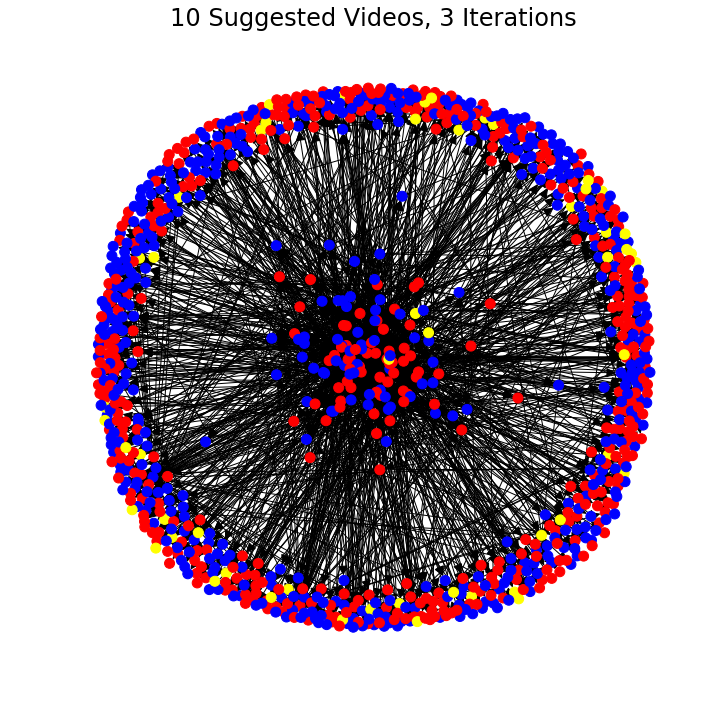

978


In [13]:
plt.figure(figsize=(12,12))
plt.title('10 Suggested Videos, 3 Iterations', fontdict={'fontsize':24})
nx.draw(G_m_10_3, node_color = color_map_m_10_3, node_size=100, arrowsize=20, pos=nx.spring_layout(G_m_10_3, k=(1/15)))
plt.show()
print(G_m_10_3.number_of_nodes())

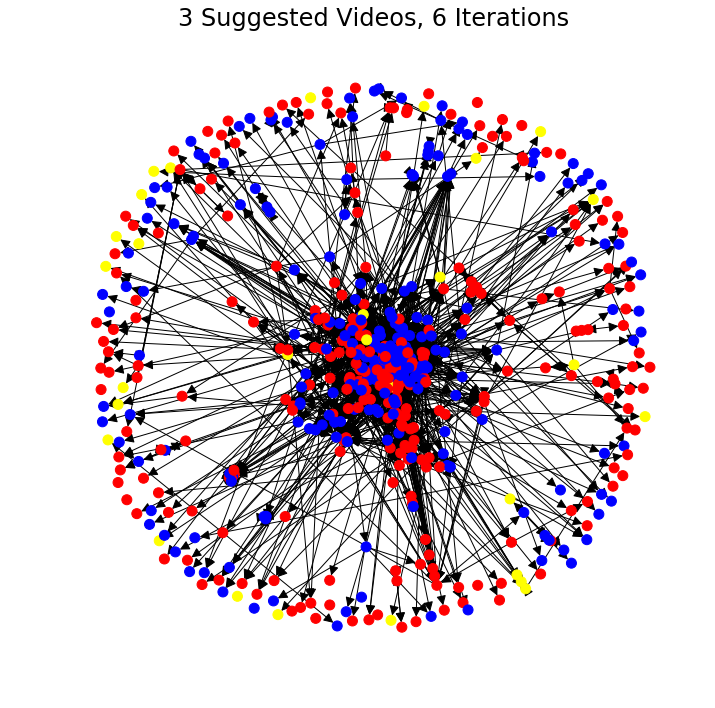

565


In [14]:
plt.figure(figsize=(12,12))
plt.title('3 Suggested Videos, 6 Iterations', fontdict={'fontsize':24})
nx.draw(G_m_3_6, node_color = color_map_m_3_6, node_size=100, arrowsize=20, pos=nx.spring_layout(G_m_3_6, k=(1/15)))
plt.show()
print(G_m_3_6.number_of_nodes())

In [20]:
times = []
for video in G_nopol36:
    times.append(video_data_nopol36[video]['time'])
print(np.median(times))
print(np.mean(times))
print(np.std(times))

10.616666666666667
21.100454449376457
30.289498395774483
